In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test on random.rand ~ N(0, 1)

In [2]:
x = np.random.randn(1000000)
x[:20]

array([-1.797589  , -0.93999764,  1.51299204, -0.38829357,  0.05448361,
        0.87076557,  1.64408109, -0.56255493,  0.63764883,  0.21042254,
       -1.03318884, -0.97060479, -1.38136327, -0.5128269 , -2.53810628,
        0.40155024,  1.27216656,  0.19210538, -0.91083702, -1.10371202])

In [3]:
x.mean()   # expect

0.0009370521529428784

In [4]:
x.var()   #variance

1.001474529617792

generate test data

In [13]:

y_arr = np.array([])
n = 100
center = [5, 10, 15]
parts = len(center)
for c in center:
    y_arr = np.append(y_arr, np.random.randn(n//parts) + c)
print(y_arr)

[ 4.96326071  3.82919309  5.54826076  6.11251374  4.2652122   3.40240774
  4.46086351  5.53946003  8.05749003  3.45245518  5.77587406  5.82992985
  7.09579488  5.20008416  5.78953065  5.33793521  5.20844861  5.07338559
  3.55800845  3.93724311  4.02358607  3.88636262  4.90593661  6.84193016
  3.71920778  5.70611235  6.77867329  3.60432588  5.74177779  4.97603683
  4.95495515  5.12995939  6.36086564 10.64701391  8.28584265  9.67135791
 10.90551905  9.66702891  9.58414199  9.92555848  8.87460898  8.64090354
 10.24120388  9.62637443  9.44311954  8.43647788 10.86026953  9.16099244
  9.7253814   9.64280672  8.24525818 10.84666599  8.70214207  8.10312124
  9.17644809  9.82883306  8.98727581 10.36411601  9.33599074  8.82830772
  8.82632358  9.44458276  8.96201052 10.70427954  8.83002337  8.71543078
 14.88148261 16.42574141 15.2649338  12.7562396  15.07117548 15.47813699
 16.4776979  14.77412517 14.41593579 13.41868697 15.51660612 13.27183615
 15.32063672 13.0019337  14.25311313 14.03731238 14

In [72]:
x_arr = np.arange(y_arr.shape[0]) + np.random.randn(y_arr.shape[0])
# np.random.shuffle(x_arr)
print(x_arr[:10])

[0.01522367 2.71604184 1.75269458 2.17567905 2.60966918 6.31469262
 7.04185234 7.95622494 8.29543419 9.50530677]


In [73]:
D = np.stack((x_arr, y_arr), axis=1)
print(D.shape)
print(D[:10])

(99, 2)
[[0.01522367 4.96326071]
 [2.71604184 3.82919309]
 [1.75269458 5.54826076]
 [2.17567905 6.11251374]
 [2.60966918 4.2652122 ]
 [6.31469262 3.40240774]
 [7.04185234 4.46086351]
 [7.95622494 5.53946003]
 [8.29543419 8.05749003]
 [9.50530677 3.45245518]]


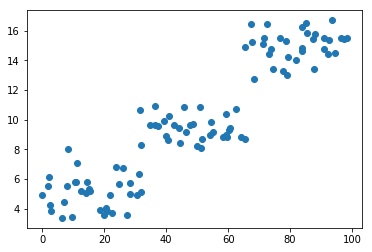

In [74]:
plt.scatter(D[:, 0], D[:, 1])

regression tree

In [60]:
max_depth = 2

In [96]:
def split_dataset(D, value):  # dataset, splitting value
    D_lte = D[ D[:, 0] <= value ]
    D_gt = D[ D[:, 0] > value]
#     if not np.any(D_lte):
#         D_lte = None
#     if not np.any(D_gt):
#         D_gt = None
    return D_lte, D_gt
    

In [99]:
# split_dataset(D, 0)

In [126]:
def cal_err(D):
    if not np.any(D):  # empty array return err 0
        return 0
    ave = np.mean(D[:, 1])
#     print(ave, (D[:, 1] - ave)**2)
    return np.sum((D[:, 1] - ave)**2)

In [131]:
# a = np.array([[1,1], [2, 4]])
# cal_err(a)

4.5

In [128]:
# cal_err(D)

In [130]:
D1, D2 = split_dataset(D, 10)
print(cal_err(D1), cal_err(D2))

18.31384750285449 1429.5150286095081


In [47]:
def reg_tree(D, depth):
    if depth == max_depth:
        node = {'type':'end', 'value':np.mean(D[:,1])}
        return node
    else:
        min_err = inf
        idx = -1
        for i in range(D.shape[0]):
            D1, D2 = split_dataset(D, D[i][0])
            total_err = cal_err(D1) + cal_err(D2)
            if total_err < min_err:
                min_err = total_err
                idx = i
                
        best_D1, best_D2 = split_dataset(D, D[idx][0])
        node = {'type':'decision', 'value':D[idx][0], 'lte_node':None, 'gt_node':None}
        if np.any(best_D1):
            node['lte_node'] = reg_tree(D1, depth+1)
        if np.any(best_D2):
            node['gt_node'] = reg_tree(D2, depth+1)
        return node
                

SyntaxError: invalid syntax (<ipython-input-47-93dc90d36bf1>, line 2)

In [49]:
reg_tree(D, depth=1)

NameError: name 'reg_tree' is not defined

In [58]:
a =np.array([[],[],[]])


In [59]:
for i in a:
    print(i)

[]
[]
[]


In [83]:
a = D[ D[:, 0] <= 1]
a

array([[0.01522367, 4.96326071]])

In [84]:
np.any(a)

True

In [109]:
a = np.array([[1,1], [2, 4]])
cal_err(D)

1713.4123956131737